# COMP47670 Assignment 1: Data Collection & Preparation
Code written by Aidan O'Sullivan

In [126]:
import json
import urllib.request
import webbrowser
import pandas as pd
import numpy as np

Relevant libraries are imported above, to faciliate the use of certain functions throughout the code.
The API used for this assignment was taken from NASA's Asteroids- NeoWs. It collects information on all near earth objects and publishes information on them at their closest approach to earth. It displays their specific ID as well as details on their motion.
The following url could be modified to retrieve information on asteroids over a week duration, with a start and end date specified:
https://api.nasa.gov/neo/rest/v1/feed?start_date=START_DATE&end_date=END_DATE&api_key=API_KEY
The following key was assigned by NASA and used to access the API:
mykey = OuK7FWSpvyktB9Z1HOw9tQJxkJrZCQcMaRhhZgVa
The API could be used to analyse what metrics the asteroids had and to see what might categorize them as a threat to planet earth

The function below is used to retrieve the data and store it in a local file in json format. It takes in a start date and an end date exactly a week apart, an API key and the location that the file will be stored. The dates and key are inserted into a url, which sends a request to the specified web page. The information is sent to the program when the request is accepted. The API is stored, read and decoded. The information is then converted to json format and stored in a local file.

In [127]:
def write_file(date_start, date_end, key, file_location):
    asteroid_url = "https://api.nasa.gov/neo/rest/v1/feed?" + "start_date=" + date_start + "&end_date=" + date_end  + "&api_key=" + key
    asteroidurlobj = urllib.request.urlopen(asteroid_url)   # API information requested from URL and stored
    asteroidread = asteroidurlobj.read().decode("utf-8")    # Received information read and decoded
    json_data = json.loads(asteroidread)                    # Data loaded as python stucture
    data_str = json.dumps(json_data, indent=2)              # Structure converted to data string. Indent added to make it more readable
    fout = open(file_location,"w")                          # File opened at location for json data to be stored
    fout.write(data_str )                                   # JSON data written to file location
    fout.close()                                            # File closed

The following cells specify the start and end dates, the API key and the location that the json file will be stored. These are sent to the write_file() function.
As the API data didn't provide asteroid information for every day, Two seperate week periods were chosen with complete data, which were as close as possible and provided consecutive asteroid data on a day by day basis. 

In [128]:
start_date = "2020-01-21"                                   
end_date = "2020-01-28"
api_key = "OuK7FWSpvyktB9Z1HOw9tQJxkJrZCQcMaRhhZgVa"
location1 = "Asteroids_api1.json"
write_file(start_date, end_date, api_key, location1)

In [129]:
start_date = "2020-02-01"
end_date = "2020-02-07"
api_key = "OuK7FWSpvyktB9Z1HOw9tQJxkJrZCQcMaRhhZgVa"
location2 = "Asteroids_api2.json"
write_file(start_date, end_date, api_key, location2)

The following function extracts data points from each asteroid stored in a json file. The data points that were chosen gave relevant information on the motion of the asteroid and could be used to asses what might cause an asteroid to be considered a threat to planet earth. These included, the specific name, the date of approach, absolute magnitude, estimated diameter, the date of close approach and whether it was categorised by NASA as a threat.
As many of these metrics were given in many different units of measurement, the data points had to be extracted in metric system only.
The data in the JSON data was looped through and the relevant information for each asteroid and appended to a list. The list was then added to a dictionary under a suitable reference. The dictionary was used to create a panda data frame, storing the information in rows and columns.

In [130]:
def create_df(location):                          # File location inputted to the function
    with open(location) as f:                     # File opened and saved in the program as f
        json_data = json.load(f)                  # The JSON data is loaded to a python structure to be used in the program
    asteroids = json_data['near_earth_objects']   # Section of the file containing the relevant data points is referenced and stored
    asteroid_df = pd.DataFrame()                  # Data frame is created
    name_list = []                                # Lists to store specifc data points created
    date_list = []
    mag_list = []
    velocity_list = []
    diam_list = []
    dist_to_earth = []
    asteroid_threat = []
    dict_info ={}                                 # Dictionary to store all lists created
    for asteroid in asteroids:
        for field in asteroids[asteroid]:         # Loops through each asteroid in the data set and appends each relevant data point to their respective lists
            name_list.append(field["name"])       
            date_list.append(field["close_approach_data"][0]["close_approach_date_full"])
            mag_list.append(field["absolute_magnitude_h"])
            velocity_list.append(field["close_approach_data"][0]["relative_velocity"]["kilometers_per_hour"])
            diam_list.append(field["estimated_diameter"]["meters"]["estimated_diameter_max"])
            dist_to_earth.append(field["close_approach_data"][0]["miss_distance"]["kilometers"])
            if field["is_potentially_hazardous_asteroid"]: 
                asteroid_threat.append(True)
            else:
                asteroid_threat.append(False)                                                              
    dict_info["Close Approach Date"] = date_list                                        # Each list is added to the same dictionary under their respective references      
    dict_info["Close Approach Date"] = pd.to_datetime(dict_info["Close Approach Date"]) # The date is set to date-teime format
    dict_info["Names"] = name_list                                                      
    dict_info["mag"] = mag_list
    velocity_list = np.array(velocity_list, dtype=np.float32)                           # Velocity list converted from a string to a float                   
    dict_info["Velocity (km/h)"] = velocity_list
    dict_info["Diameter (m)"] = diam_list
    dist_to_earth = np.array(dist_to_earth, dtype=np.float32)                            # Distance list is converted from string to a float
    dict_info["Distance to Earth (km)"] = dist_to_earth
    dict_info["Threat to Earth"] = asteroid_threat
    asteroid_df = pd.DataFrame.from_dict(dict_info)                                      # Dictionary converted to a date frame
    pd.options.display.float_format = "{:,.2f}".format                                   # All numerical values in the data frame are converted to 2 decimel point for readibility
    return asteroid_df                                                                   # Data frame returned from function


In [131]:
pd1 = create_df(location1)    # JSON files passed to the function, relevant information is extracted and converted to a data fraem
pd2 = create_df(location2)
#print(pd1)

The data frames from both weeks are concatenated to accumulate the information for analysis. 

In [132]:
frames = [pd1, pd2]                          # Data frames stored together
df_concat = pd.concat(frames)                # Data frames are concatenated
pd.set_option('display.max_rows', None)      # The following 4 lines cause Jupyter notebook to display all max amount of rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df_concat = df_concat.reset_index(drop=True)
print(df_concat)

    Close Approach Date                Names   mag  Velocity (km/h)  \
0   2020-01-21 10:04:00  509505 (2007 VL8)   21.20 92,666.08          
1   2020-01-21 19:38:00  (2015 RW35)         29.20 53,980.84          
2   2020-01-21 02:16:00  (2016 BG15)         27.00 40,049.01          
3   2020-01-21 00:42:00  (2017 YH)           18.40 55,387.76          
4   2020-01-21 08:09:00  (2018 SF3)          25.30 17,176.20          
5   2020-01-21 08:36:00  (2019 YX5)          21.20 38,282.18          
6   2020-01-21 17:49:00  (2020 BB)           28.60 13,450.87          
7   2020-01-21 23:56:00  (2020 BN)           27.80 21,868.70          
8   2020-01-21 17:13:00  (2020 BP)           25.70 60,167.98          
9   2020-01-21 21:57:00  (2020 BY)           24.50 60,297.17          
10  2020-01-21 15:51:00  (2020 BK1)          22.80 54,654.07          
11  2020-01-21 07:35:00  (2020 BP1)          27.20 18,732.68          
12  2020-01-21 13:37:00  (2020 BS1)          26.31 19,865.38          
13  20

<ipython-input-132-f2010f1ab7cf>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


The following two cell were used to detect missing information in the data frame. The first cell checks to see if there is any missing values and the second cell checks the data type of each cell. If a numerical value was missing and was instead a string was added to indicate that it was missing, this would be detected.
As no missing values were detected and the data types in each column corresponded to what they were expected to be, it was concluded that there was no missing data.

In [133]:
#look for missing data
df_concat.isnull().sum() # Check for missing values in the dataset

Close Approach Date       0
Names                     0
mag                       0
Velocity (km/h)           0
Diameter (m)              0
Distance to Earth (km)    0
Threat to Earth           0
dtype: int64

In [134]:
df_concat.dtypes.value_counts() 

float64           2
float32           2
object            1
datetime64[ns]    1
bool              1
dtype: int64

In the cell below a new data frame is created. The mean data for each data point is calculated for both weeks seperatley. The velocity and diameter of the asterpoids were larger in the second week on average, perhaps explaining why there was more of a threat to earth during this week. Interestingly by mean the asteroids approached earth by over 20,000 km closer in the first week. More analysis will be carried out on this later.

In [135]:
biweekly = df_concat.groupby([pd.Grouper(key='Close Approach Date',freq='M')])
avg_biweekly = biweekly.mean()
print(avg_biweekly)

                      mag  Velocity (km/h)  Diameter (m)  \
Close Approach Date                                        
2020-01-31          24.34 42,473.10        205.95          
2020-02-29          23.75 49,446.74        333.27          

                     Distance to Earth (km)  Threat to Earth  
Close Approach Date                                           
2020-01-31          25,200,072.00           0.05              
2020-02-29          30,595,184.00           0.07              


The data frame containing two weeks of asteroid information (274 asteroids) is further analysed statistically. An intersting data point is that the minimum distance an asteroid approaches earth is 15,724 km. This is very close and could be considered potentially hazordous. Any asteroid that travels within 7.5 million kilometeres of the earth is considered a hazardous. Thankfully the mean was quite a bit larger than this at 27.6 million kilometers. This implies that most of the detected asteroids were not a cause for concern. Still 25% of asteroids were lower than 5.117 million kilometeres and could have a potnetial of being hazordous
As any asteroids above 35 m can pose a threat if it hits the earth the mean of 262 m means that a good proportion of the asteroids could cause damage on impact, if they had come in direct path with the earth. The maximum diameter asteroid was 4,742 m and would cause enormous destruction and fill the atmosphere with debris.

In [136]:
print(df_concat.describe())
df_concat['Threat to Earth'].value_counts()

         mag  Velocity (km/h)  Diameter (m)  Distance to Earth (km)
count 274.00 274.00           274.00        274.00                 
mean  24.07  45,578.17        262.64        27,602,276.00          
std   3.09   24,448.19        507.80        23,484,430.00          
min   15.49  5,702.84         1.87          15,724.64              
25%   21.80  27,628.18        33.05         5,117,984.25           
50%   24.58  40,135.89        72.12         22,182,026.00          
75%   26.28  58,058.35        259.44        47,343,315.00          
max   32.52  123,624.32       4,742.86      74,217,520.00          


False    258
True     16 
Name: Threat to Earth, dtype: int64

The following 3 cells can be printed to view the data frame, grouped according to one individual metric. This was viewed preliminary to see if the maximum or minimum values would be more likely to be deemed a threat to earth. As there is a lot of data, further analysis will be carried out using graphs.

In [137]:
distance_df = df_concat.drop(['mag', 'Velocity (km/h)','Diameter (m)', 'Names', 'Close Approach Date'], axis=1) # Specified columns are dropped from the data frame
distance_df = distance_df.groupby("Distance to Earth (km)")                                                     # Columns grouped in order of ascending distance
#print(distance_df.max())

In [138]:
diameter_df = df_concat.drop(['Distance to Earth (km)', 'mag', 'Velocity (km/h)', 'Names'], axis=1) # Specified columns are dropped from the data frame
diameter_df = diameter_df.groupby("Diameter (m)")                                                   # Columns grouped in order of ascending diameter
#print(diameter_df.max())

In [139]:
velocity_df = df_concat.drop(['Distance to Earth (km)', 'mag', 'Diameter (m)', 'Names', 'Close Approach Date'], axis=1) # Specified columns are dropped from the data frame
velocity_df = velocity_df.groupby("Velocity (km/h)")                                                                    # Columns grouped in order of ascending velocity
#print(velocity_df.max())

The data frame was split up further into two columns with the corresponding threat levels stored in arrays. This could be used to show the asteroids that were categorised as a threat when they are shown on the scatter plots.

In [140]:
velocity_diameter = df_concat.drop(['Names', 'mag', 'Close Approach Date', 'Distance to Earth (km)'],axis = 1) # Columns grouped in order of ascending distance
arr1 = velocity_diameter["Threat to Earth"].to_numpy()  # The corresponding threat status of the asteroids stored in an array

In [141]:
distance_velocity = df_concat.drop(['Names', 'mag', 'Close Approach Date', 'Diameter (m)' ],axis = 1)
arr2 = distance_velocity["Threat to Earth"].to_numpy()

In [142]:
distance_diameter = df_concat.drop(['Names', 'mag', 'Close Approach Date', "Velocity (km/h)"],axis = 1)
arr3 = distance_diameter["Threat to Earth"].to_numpy()

In [143]:
distance_magnitude = df_concat.drop(['Names', 'Close Approach Date', 'Velocity (km/h)', 'Diameter (m)'],axis = 1)
arr4 = distance_magnitude["Threat to Earth"].to_numpy()

The grouped data could now be repersented on graphs to gain a better understanding of the data and to draw conclusions on what might categorize an asteroid as a threat. Matplotlib libraries could be to plot the data

In [144]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The first scatter plot repersents velocity vs diameter. The asteroids that were categorised as a threat to planet earth are shown in yellow. A correlation is apparent in this plot. Most of the yellow asteroids appear to have a high velocity and a high diameter but this is not true for all, implying other factors are important too. The reason that high velocity and diameter asteroids would be considered a threat is due to the substantially extra destruction they could cause if they hit the earth. However some high velocity and diameter asteroids are not considered a threat and this may be due to the distance they are from the earth and other such factor.This will be examined further.

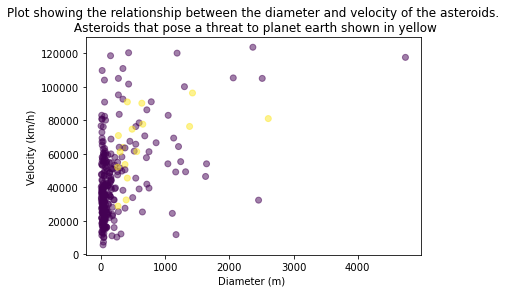

In [145]:
plt.scatter(velocity_diameter['Diameter (m)'], velocity_diameter['Velocity (km/h)'], c=arr1, alpha=0.5)
plt.title("Plot showing the relationship between the diameter and velocity of the asteroids.\n Asteroids that pose a threat to planet earth shown in yellow")
plt.ylabel("Velocity (km/h)")
plt.xlabel("Diameter (m) ")
plt.show()

This plot shows distance vs velocity. Again a noticable correlation is present between higher velocity asteroids posing a high threat level. A weak correlation is shown between distance and threat level. With more potentially threatening asteroids amongst those that came closer to earth. 

Text(0.5, 0, 'Distance to Earth (km)')

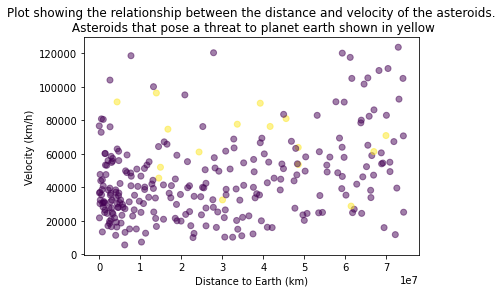

In [146]:
plt.scatter(distance_velocity['Distance to Earth (km)'], velocity_diameter['Velocity (km/h)'], c=arr2, alpha=0.5)
plt.title("Plot showing the relationship between the distance and velocity of the asteroids.\n Asteroids that pose a threat to planet earth shown in yellow")
plt.ylabel("Velocity (km/h)")
plt.xlabel("Distance to Earth (km)")

The plot below shows diameter vs distance. Again a good proportion of threatening asteroid are amongst the highest in diameter. This appears to have a higher correlation with threat level than the distance they approach the earth. This is suprising as my intuition would be that even a small asteroid but close can be quite destructive, but a large one that is quite far away may not pose any danger. Perhaps small asteroids that are close may burn out on entry and not cause harm. Asteroids under 1 kilometer would cause extensive local damage but would not be a gloabal threat. The data shows that 3 potentially threatening asteroids measure over 1 km in diameter, the largest being 2.606 km.

Text(0.5, 0, 'Distance to Earth (km)')

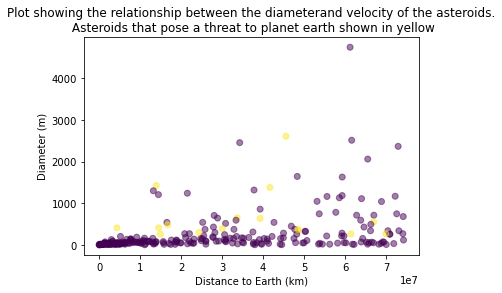

In [147]:
plt.scatter(distance_diameter['Distance to Earth (km)'], distance_diameter['Diameter (m)'], c=arr3, alpha=0.5)
plt.title("Plot showing the relationship between the diameterand velocity of the asteroids.\n Asteroids that pose a threat to planet earth shown in yellow")
plt.ylabel("Diameter (m)")
plt.xlabel("Distance to Earth (km)")

The plot below shows absolute magnitude vs distance. The absolute magnitude is the brightness of the asteroid and is used to calculate the diameter of the asteroid.

Text(0.5, 0, 'Distance to Earth (km)')

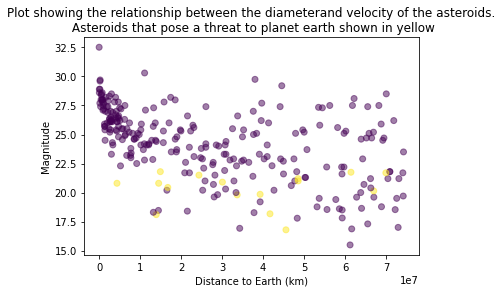

In [148]:
plt.scatter(distance_magnitude['Distance to Earth (km)'], distance_magnitude['mag'], c=arr4, alpha=0.5)
plt.title("Plot showing the relationship between the diameterand velocity of the asteroids.\n Asteroids that pose a threat to planet earth shown in yellow")
plt.ylabel("Magnitude")
plt.xlabel("Distance to Earth (km)")

An important metric to analyse is how many detected asteroids in that period posed a potential threat to planet earth. 16 asteroids out 274 were categorised as dangerous. That is 6% of all detected asteroids. This is quite a large number and shows the importance of developing an asteroid defense system for the planet. If it is this common all it takes is for one of the asteroids with high velocity and high diameter to enter the earths atmosphere, causing huge destruction to the planet and potentially even mass extinction.

False   0.94
True    0.06
Name: Threat to Earth, dtype: float64
False    258
True     16 
Name: Threat to Earth, dtype: int64


<AxesSubplot:ylabel='None'>

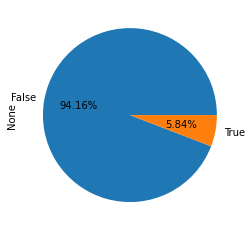

In [149]:
true_count = df_concat['Threat to Earth'].value_counts(True)
false_count = df_concat['Threat to Earth'].value_counts(False)
print(true_count)
print(false_count)
df_concat.groupby('Threat to Earth').size().plot.pie(autopct='%1.2f%%')

Plot showing the closest distance the asteroids were from earth over the two week period. The gap in dates is due to the unavailability of data for certain days that NASA did not provide. The plot goes the distance of the asteroids fluctuating in  a similiar range and pattern over the two weeks with no real outliers.

Text(0, 0.5, 'Distance to Earth (km)')

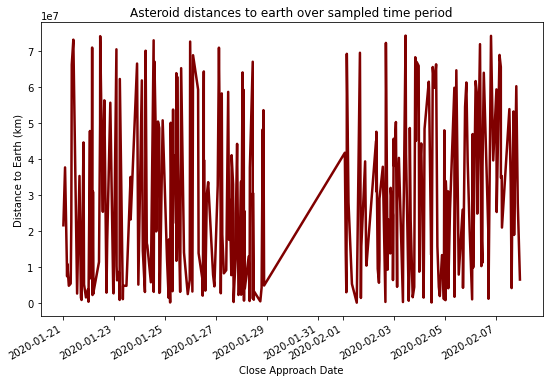

In [150]:
df_concat = df_concat.set_index('Close Approach Date')
df_concat["Distance to Earth (km)"].plot(figsize=(9,6), title="Asteroid distances to earth over sampled time period", linewidth=2.5, color="maroon")
plt.ylabel("Distance to Earth (km)")

The plot shows the diameter of the asteroids over the two week period. This is a convenient method of showing how big they were on a day by day basis. The largest asteroid occured on the 5th of March 2020 and it is visibly substantially larger than the rest of the asteroids at over 4000 m in diameter. This outlier occurs only over a two week period and shows the huge threat that they could potentially pose to the planet. Thankfully in this case this asteroid is not currently considered a threat to the earth.

Text(0, 0.5, 'Diameter (m)')

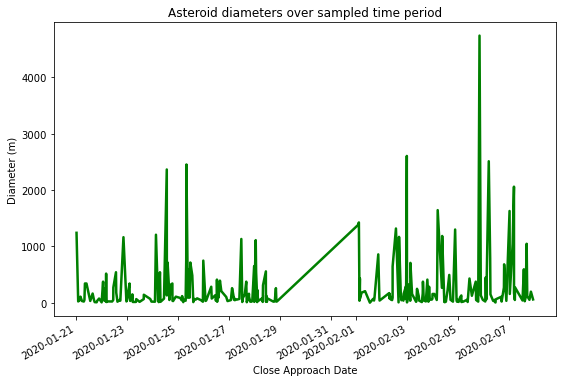

In [151]:
df_concat["Diameter (m)"].plot(figsize=(9,6), title="Asteroid diameters over sampled time period", linewidth=2.5, color="green")
plt.ylabel("Diameter (m)")

This plot shows the velocities of the asteroids over the two week period. There doesn't appear to much difference in fluctuation of the velocities over time.

Text(0, 0.5, 'Velocity (km/h)')

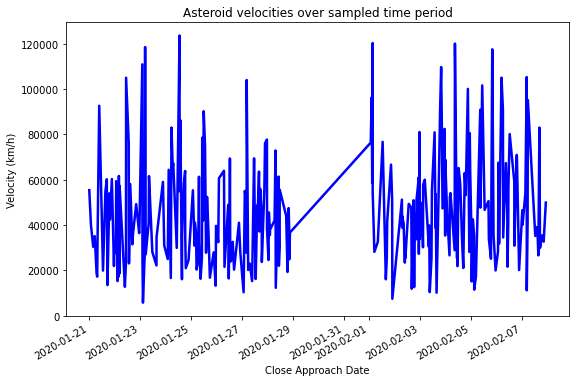

In [152]:
df_concat["Velocity (km/h)"].plot(figsize=(9,6), title="Asteroid velocities over sampled time period", linewidth=2.5, color="blue")
plt.ylabel("Velocity (km/h)")

# Conclusion
The data provides us with an interesting insight into the motion of asteroids that pass by our planet on a daily basis. Acquiring and understanding this data is very important, so we can predict the trajectory of each asteroid and predict when they may be on collison course with the earth. This is also important for our plans to mine minerals from these asteroids, that are becoming short in supply on earth. From the data it is clear that many metrics are considered when classifying the threat level of the asteroid. While initially I thought the most important metric would have been the distance of the close approach to the earth. The plots seem to indicate however that a high diameter and velocity of an asteroid in many cases can be considered more of a threat to planetary safety. Perhaps other metrics that limited this experiment and should be included to paint a more comperhensive picture of what might cause an asteroid to be dangerous. These might include direction of travel, closeness to the moon and future danger. The direction of travel is important, as close asteroids that are travelling away from the earth would not be considered dangerous. Some asteroids that travel close to the moon could have their path altered by the moon's gravitational field and end up changing course towards the earth from a previously benign trajectory. The future course of an asteroid is important too because perhaps at each orbit of the sun its path could be edging ever closer to the earth. These extra data points could provide a more complete picture of an asteroid's threat level.
An astounding 6% of asteroids detected over this two week period are considered a threat. This is a very high proportion and it highlights the need for an adequete asteroid defense system for the planet. This level of monitoring of asteroids by NASA should provide us with information on when an asteroid is on collision course with the earth, many years in advance. However, we should act now to develop this technology to prevent the devestating effect of a collision. Thankfully such programs are underway by the United States and European union who are developing spacecrafts that can collide with the asteroid and alter its course. However there is a lack of urgency with these programs and it may take up to 10 years of preperation to make them fully operational. This is why this early warning system is so important. During this short time period three asteroids over 1 km were detected that were categorised as a potential threat. Asteroids over 1 km could cause mass global destruction.
It would be interesting to expand this data collection over a longer period of time such as a year or more to provide a more complete picture of how many asteroids pose a threat, with the extra data points previously mentioned added in. This program is easily altered to collect and process more data for extra weeks of data that NASA provide, using the adaptable function developed in this assignment. Due to time constraints plans to map out each asteroid using Bokeh were no realised. Each asteroid could be repersented at its close approach distance and its size would be its scaled diameter for accurate visualisation. From a space mining point of view photo-analysis of the reflected light from the asteroid could be carried out to find out what kind of minerals they hold. An acceleration of technology to both exploit and protect us from these asteroids is neccessary. 